# 



Predicting Credit Card Application Approval
### **Problem Statement** 
Financial institutions receive numerous credit card applications daily, and efficient, accurate approval processes are crucial for both customer satisfaction and risk management. The dataset in this competition includes anonymized data about applicants, which makes it essential to focus on data exploration and engineering techniques to extract meaningful insights.

### *Our task is to:*
- Understand the underlying patterns in the dataset.
- Handle missing and noisy data effectively.
- Engineer features that improve model performance.
- Build and evaluate machine learning models to predict application status.

### **Data Overview**
The dataset is anonymized and contains both numerical and categorical features, along with a target variable (`STATUS`) indicating the application decision. 

### **Objectives**
1. Perform thorough **Exploratory Data Analysis (EDA)** to uncover insights and identify data quality issues.
2. Implement effective **data preprocessing** techniques to handle missing values and encode categorical features.
3. Design and test various **machine learning models**, including classical algorithms and gradient boosting frameworks.
4. Use appropriate evaluation metrics for classification and address class imbalance issues.
5. Optimize the model pipeline for accuracy and robustness.

### **Approach**
This notebook is structured to follow a systematic data science workflow:
1. **Data Exploration**: Gain an understanding of the dataset through visualization and statistical analysis.
2. **Preprocessing**: Clean and prepare the data for modeling, ensuring no information is leaked.
3. **Feature Engineering**: Enhance the dataset with new features or transformations to improve model performance.
4. **Modeling**: Train, test, and evaluate machine learning models to identify the best-performing approach.
5. **Insights and Conclusions**: Summarize findings, evaluate model effectiveness, and suggest potential improvements.

---

### **Tools and Libraries**
We will use the following tools and libraries:
- **Pandas and NumPy**: For data manipulation and analysis.
- **Matplotlib and Seaborn**: For visualizing data and insights.
- **Scikit-learn, XGboost,and LightGBM**: For building, training, and evaluating machine learning models.
- **Imbalanced-learn (SMOTE)**: To handle class imbalance in the dataset.

---

### **Expected Outcomes**
By the end of this project, we aim to:
- Develop a high-performing machine learning model that predicts credit card application approval with high accuracy.
- Understand key factors influencing model predictions, even with anonymized data.
- Present a structured, reproducible workflow demonstrating strong analytical and modeling skills.


# 1. Importing libraries

In [2]:
# Importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
features = pd.read_csv("input/a-credit-card-dataset-for-machine-exam/application_record.csv")
target = pd.read_csv("/kaggle/input/a-credit-card-dataset-for-machine-exam/credit_record.csv")

In [3]:
# Check the summary of the Target data
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [4]:
# Check the summary of the Features data
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
# Merge the target and features datasets on 'ID'
data = pd.merge(target, features, on='ID', how='inner')

In [6]:
# Display the first 5 rows of the merged dataset
data.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [7]:
# Summary information about the merged dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [8]:
# Descriptive statistics of the merged dataset
data.describe()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,7.777150e+05,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,-19.373564,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837
std,4.180442e+04,14.082208,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380
min,5.008804e+06,-60.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.044568e+06,-29.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.069530e+06,-17.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115551e+06,-8.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,0.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


# 2. **Target Encoding for Application Status**


In [9]:
# Unique values in the target variable 'STATUS'
data.STATUS.unique()

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

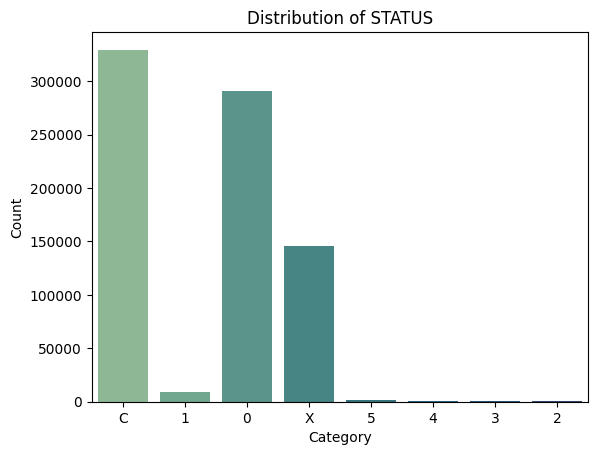

In [10]:
# Plotting the distribution of application statuses
sns.countplot(x='STATUS', data=data, palette='crest')
plt.title('Distribution of STATUS')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

* 0: 1-29 days past due

* 1: 30-59 days past due 

* 2: 60-89 days past due 

* 3: 90-119 days past due 

* 4: 120-149 days past due 

* 5: More than 150 days past due 

* C: Paid off that month 

* X: No loan for the month e month for the month

In [11]:
# Define a mapping for target encoding
status_mapping = {
    'C': 0,  # Approved
    'X': 0,  # Approved
    '0': 1,  # Not Approved
    '1': 1,  # Not Approved
    '2': 1,  # Not Approved
    '3': 1,  # Not Approved
    '4': 1,  # Not Approved
    '5': 1   # Not Approved
}

# Map STATUS to target categories
data['STATUS_CATEGORY'] = data['STATUS'].map(status_mapping)

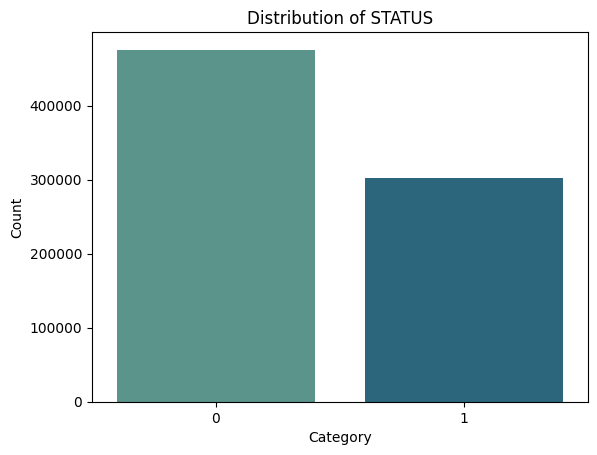

In [12]:
# Plotting the distribution of application status after mapping
sns.countplot(x='STATUS_CATEGORY', data=data, palette='crest')
plt.title('Distribution of STATUS')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 4. **Aggregating Features for Enhanced Insights**

"We observed that some IDs in the dataset appeared in multiple rows. To address this issue, we implemented a solution that aggregates the data, ensuring each ID corresponds to a single entry."

In [13]:
# Filter the data to include only records with MONTHS_BALANCE < 1 before aggregation
data = data[data['MONTHS_BALANCE'] <=0]
# Now aggregate based on the shifted data
aggregated_features = data.groupby('ID').agg({
    'MONTHS_BALANCE': 'count',                   # Total months in credit history
    'STATUS_CATEGORY': ['mean', 'max', 'sum'],   # Aggregate based on 'STATUS_CATEGORY'
})

# Flatten multi-level columns
aggregated_features.columns = ['_'.join(col).strip() for col in aggregated_features.columns]
aggregated_features = aggregated_features.reset_index()



In [14]:
# Select unique demographic features by dropping duplicates
demographics = data.drop_duplicates(subset='ID').drop(['MONTHS_BALANCE', 'STATUS'], axis=1)

# Merge datasets
data = pd.merge(demographics, aggregated_features, on='ID', how='left')


In [15]:
# Display the merged dataset with demographic features
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_CATEGORY,MONTHS_BALANCE_count,STATUS_CATEGORY_mean,STATUS_CATEGORY_max,STATUS_CATEGORY_sum
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,0,16,0.125000,1,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,0,15,0.133333,1,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,30,0.233333,1,7
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,1,5,0.400000,1,2
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,5,0.000000,0,0


# 5. **Visualizing Demographics and Risks**

In [16]:
# Count the occurrences of each category in STATUS_CATEGORY
data['STATUS_CATEGORY'].value_counts()

STATUS_CATEGORY
0    27619
1     8838
Name: count, dtype: int64

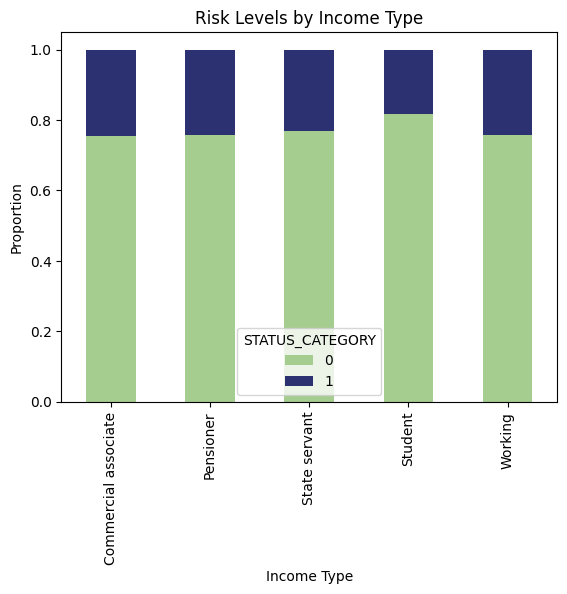

In [17]:
# Cross-tabulation and visualization of risk levels by income type
pd.crosstab(data['NAME_INCOME_TYPE'], data['STATUS_CATEGORY'], normalize='index').plot(kind='bar', stacked=True, colormap='crest')
plt.title('Risk Levels by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Proportion')
plt.show()

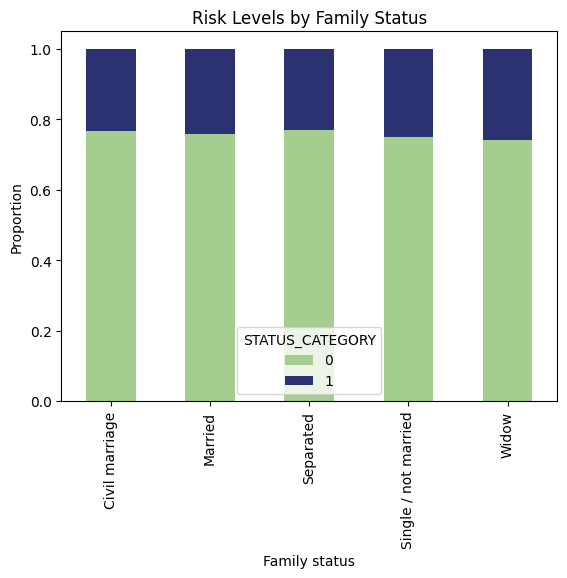

In [18]:
# Cross-tabulation and visualization of risk levels by Family status
pd.crosstab(data['NAME_FAMILY_STATUS'], data['STATUS_CATEGORY'], normalize='index').plot(kind='bar', stacked=True, colormap='crest')
plt.title('Risk Levels by Family Status')
plt.xlabel('Family status')
plt.ylabel('Proportion')
plt.show()

# 6. **Exploring Categorical Variables**

In [19]:
# Display unique values for categorical columns
print('CODE_GENDER:',data['CODE_GENDER'].unique())
print('FLAG_OWN_CAR:',data['FLAG_OWN_CAR'].unique())
print('FLAG_OWN_REALTY:',data['FLAG_OWN_REALTY'].unique())
print('NAME_INCOME_TYPE:',data['NAME_INCOME_TYPE'].unique())
print('NAME_EDUCATION_TYPE:',data['NAME_EDUCATION_TYPE'].unique())
print('NAME_FAMILY_STATUS:',data['NAME_FAMILY_STATUS'].unique())
print('NAME_HOUSING_TYPE:',data['NAME_HOUSING_TYPE'].unique())
print('OCCUPATION_TYPE:',data['OCCUPATION_TYPE'].unique())

CODE_GENDER: ['M' 'F']
FLAG_OWN_CAR: ['Y' 'N']
FLAG_OWN_REALTY: ['Y' 'N']
NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_EDUCATION_TYPE: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
OCCUPATION_TYPE: [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


# 7. **Data Cleaning and Preparation**

In [20]:
# Check for missing values
data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE         11323
CNT_FAM_MEMBERS             0
STATUS_CATEGORY             0
MONTHS_BALANCE_count        0
STATUS_CATEGORY_mean        0
STATUS_CATEGORY_max         0
STATUS_CATEGORY_sum         0
dtype: int64

In [21]:
# Drop unnecessary columns
data.drop(['FLAG_MOBIL','FLAG_WORK_PHONE','CNT_CHILDREN','OCCUPATION_TYPE'],axis=1,inplace=True)

In [22]:
# Drop rows with missing values
data.dropna(inplace=True)
data.isna().sum()

ID                      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
AMT_INCOME_TOTAL        0
NAME_INCOME_TYPE        0
NAME_EDUCATION_TYPE     0
NAME_FAMILY_STATUS      0
NAME_HOUSING_TYPE       0
DAYS_BIRTH              0
DAYS_EMPLOYED           0
FLAG_PHONE              0
FLAG_EMAIL              0
CNT_FAM_MEMBERS         0
STATUS_CATEGORY         0
MONTHS_BALANCE_count    0
STATUS_CATEGORY_mean    0
STATUS_CATEGORY_max     0
STATUS_CATEGORY_sum     0
dtype: int64

In [23]:
# Check for duplicate rows 
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [24]:
# Convert DAYS_BIRTH to age in years
data['AGE'] = abs(data['DAYS_BIRTH']) // 365

# Convert DAYS_EMPLOYED to employment duration in years
data['EMPLOYMENT_DURATION'] = abs(data['DAYS_EMPLOYED']) // 365

# Drop the original DAYS_BIRTH and DAYS_EMPLOYED columns
data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

**Convert DAYS_BIRTH to age in years**
\
This transformation allows us to interpret the age of the applicants in a more intuitive way by converting the negative number of days into a positive integer representing the age in years.

**Convert DAYS_EMPLOYED to employment duration in years**
\
Similarly, this transformation converts the negative number of days of employment into a positive integer representing the length of employment in years,which can be useful for understanding the applicant's work history.

# 8. **Visualizing Feature Distributions**

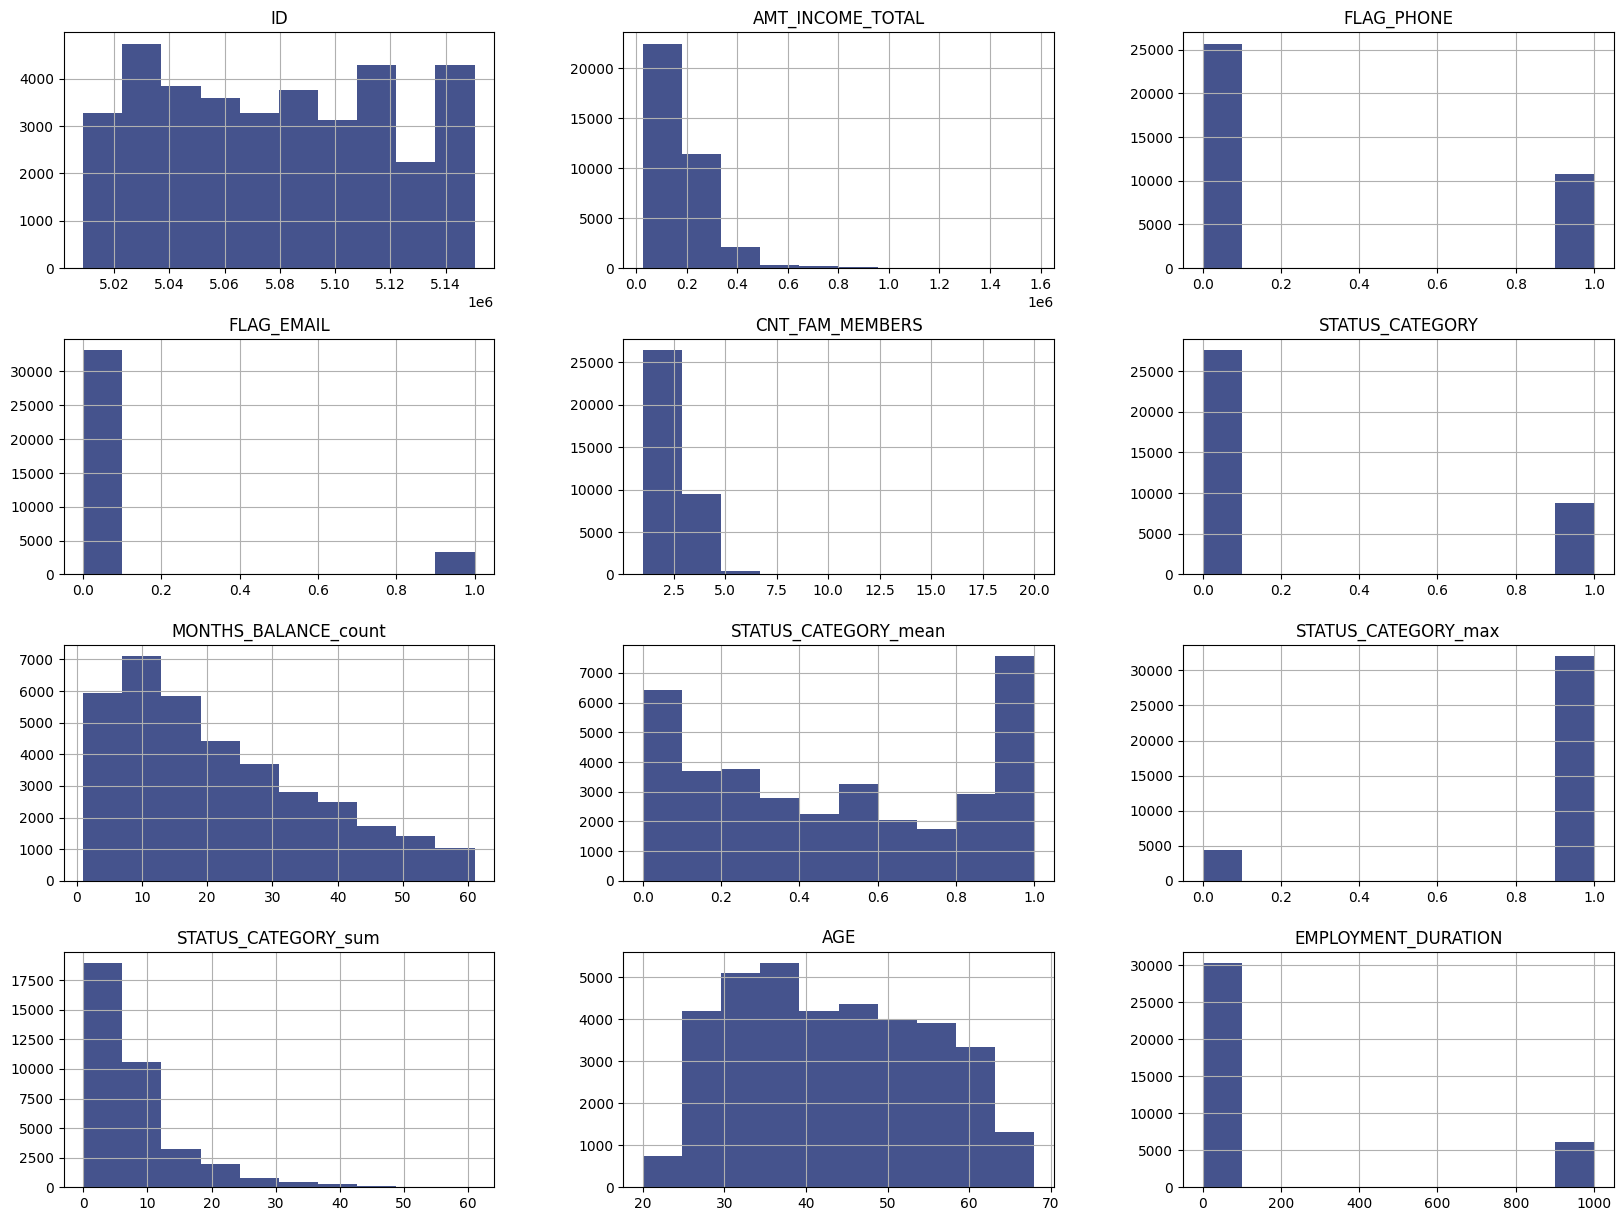

In [25]:
#Visualizing the features to know the distribution for each one of them
data.hist(figsize=(20,15),color='#45538D')
plt.show()

# 9. **Correlation Analysis**

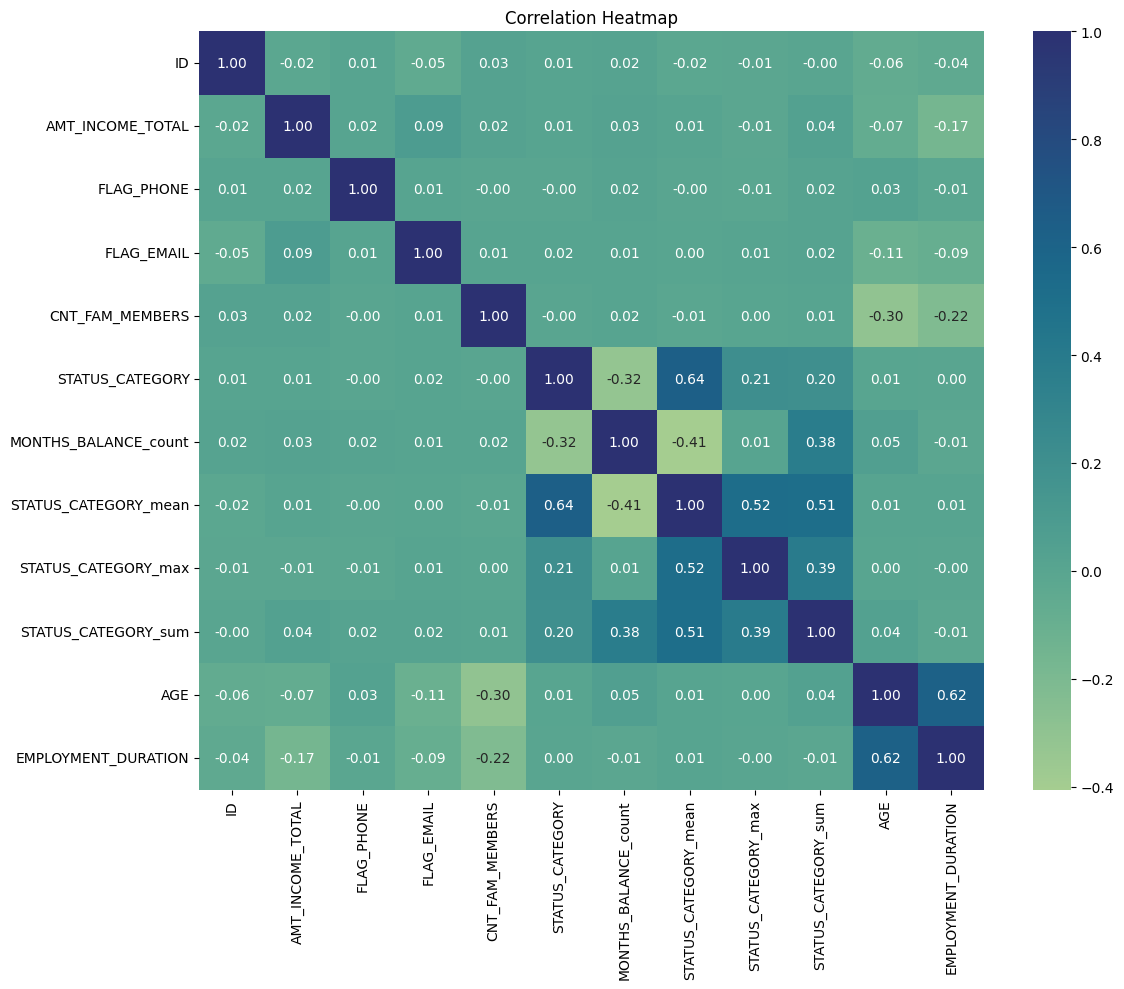

In [26]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt='.2f')

# Set the title
plt.title('Correlation Heatmap')
plt.tight_layout()

# Show the plot
plt.show()

# 10. **Encoding Categorical Features**

In [27]:
#Label Encoding
LE=LabelEncoder() # Initialize Label Encoder

# List of columns to encode
columns_to_encode = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Apply Label Encoding to each specified column
for column in columns_to_encode:
    data[column] = LE.fit_transform(data[column])

# Display the first few rows of the modified DataFrame
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS_CATEGORY,MONTHS_BALANCE_count,STATUS_CATEGORY_mean,STATUS_CATEGORY_max,STATUS_CATEGORY_sum,AGE,EMPLOYMENT_DURATION
0,5008804,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,0,2.0,0,16,0.125000,1,2,32,12
1,5008805,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,0,0,2.0,0,15,0.133333,1,2,32,12
2,5008806,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,2.0,0,30,0.233333,1,7,58,3
3,5008808,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,1,1.0,1,5,0.400000,1,2,52,8
4,5008809,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,1,1.0,0,5,0.000000,0,0,52,8


In [28]:
# Get list of remaining categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

data = pd.get_dummies(data, columns=object_cols, drop_first=True)  

# Display the first few rows of the encoded DataFrame
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS_CATEGORY,MONTHS_BALANCE_count,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,1,1,1,427500.0,0,0,2.0,0,16,...,False,False,False,False,False,False,False,False,True,False
1,5008805,1,1,1,427500.0,0,0,2.0,0,15,...,False,False,False,False,False,False,False,False,True,False
2,5008806,1,1,1,112500.0,0,0,2.0,0,30,...,True,True,False,False,False,True,False,False,False,False
3,5008808,0,0,1,270000.0,1,1,1.0,1,5,...,True,False,False,True,False,True,False,False,False,False
4,5008809,0,0,1,270000.0,1,1,1.0,0,5,...,True,False,False,True,False,True,False,False,False,False


In [29]:
# Get boolean columns
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)
print(data.dtypes)

ID                                                     int64
CODE_GENDER                                            int64
FLAG_OWN_CAR                                           int64
FLAG_OWN_REALTY                                        int64
AMT_INCOME_TOTAL                                     float64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
CNT_FAM_MEMBERS                                      float64
STATUS_CATEGORY                                        int64
MONTHS_BALANCE_count                                   int64
STATUS_CATEGORY_mean                                 float64
STATUS_CATEGORY_max                                    int64
STATUS_CATEGORY_sum                                    int64
AGE                                                    int64
EMPLOYMENT_DURATION                                    int64
NAME_INCOME_TYPE_Pensioner                             int64
NAME_INCOME_TYPE_State s

# 12. **Handling Class Imbalance with SMOTE**
SMOTE is used to generate synthetic samples for the minority
class.\
This helps to improve model performance by providing a more balanced dataset, allowing the model to learn better decision boundaries and reduce bias towards the majority class.


In [30]:
# Separate features and target variable
X = data.drop(['STATUS_CATEGORY'], axis=1)
y = data['STATUS_CATEGORY']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
STATUS_CATEGORY
0    27619
1     8838
Name: count, dtype: int64

Resampled class distribution:
STATUS_CATEGORY
0    27619
1    27619
Name: count, dtype: int64


In [31]:
# Model Evaluation Function
def model_Evaluate(y_actual, y_predicted):

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_actual, y_predicted))

    # Compute the Confusion matrix
    cf_matrix = confusion_matrix(y_actual, y_predicted)

    # Get unique class labels
    categories = np.unique(y_actual)

    # Plot the Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, cmap='crest', fmt='d',
                xticklabels=categories, yticklabels=categories)
    

    # Add axis labels and title
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()


# 13. **Splitting the Data into Train and Test Sets**


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 14. **Model Training and Evaluation**

# LightGBM Classifier
LightGBM is a gradient boosting framework that uses tree-based learning algorithms.
It's known for its efficiency and speed, especially on large datasets

The model's accuracy on the test set is: 91.59123823316438%
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5545
           1       0.93      0.89      0.91      5503

    accuracy                           0.92     11048
   macro avg       0.92      0.92      0.92     11048
weighted avg       0.92      0.92      0.92     11048



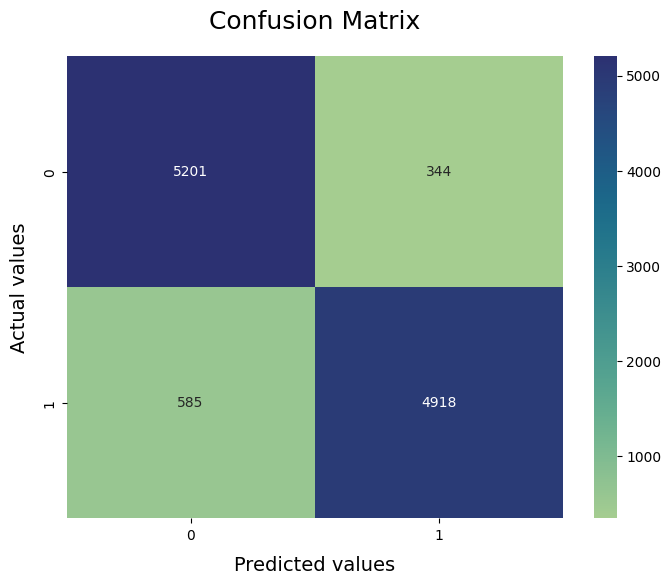

In [33]:
# Initialize LightGBM classifier
model_lgb = lgb.LGBMClassifier(class_weight='balanced', random_state=42,verbose= -1,objective='binary')

# Train the model
model_lgb.fit(X_train, y_train)

# Make predictions
lgb_pred = model_lgb.predict(X_test)

# Evaluate
print("The model's accuracy on the test set is: " + str(model_lgb.score(X_test,y_test)*100)+ "%")
model_Evaluate(y_test,lgb_pred)

# Random Forest Classifier
Random Forest is an ensemble learning method that constructs multiple decision trees,during training and outputs the mode of their predictions. It's robust against overfitting
and performs well on large datasets.

The model's accuracy on the test set is: 93.0394641564084%
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5545
           1       0.93      0.93      0.93      5503

    accuracy                           0.93     11048
   macro avg       0.93      0.93      0.93     11048
weighted avg       0.93      0.93      0.93     11048



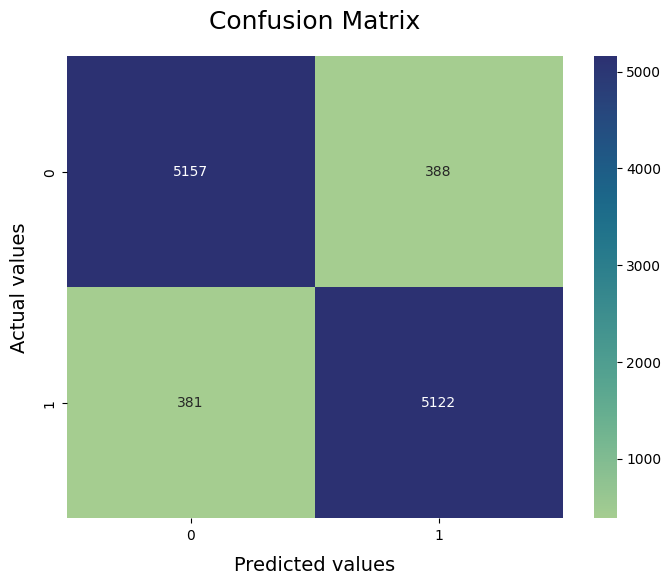

In [34]:
# Initialize Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate
print("The model's accuracy on the test set is: " + str(rf_model.score(X_test,y_test)*100)+ "%")
model_Evaluate(y_test,rf_pred)


# XGBoost Classifier
XGBoost is a scalable and highly efficient implementation of gradient boosting.
It provides better performance and accuracy due to its optimizations and handling of sparse data.

The model's accuracy on the test set is: 91.78131788559016%
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5545
           1       0.90      0.95      0.92      5503

    accuracy                           0.92     11048
   macro avg       0.92      0.92      0.92     11048
weighted avg       0.92      0.92      0.92     11048



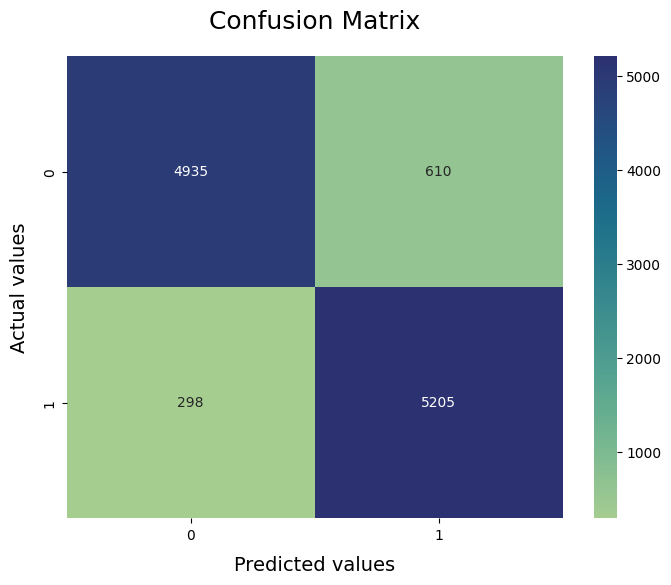

In [35]:
# Initialize XGBoost classifier
model_xg = XGBClassifier(scale_pos_weight=2, random_state=42)  

# Train the model
model_xg.fit(X_train, y_train)

# Make predictions
xg_pred = model_xg.predict(X_test)

# Evaluate
print("The model's accuracy on the test set is: " + str(model_xg.score(X_test,y_test)*100)+ "%")
model_Evaluate(y_test,xg_pred)

# AdaBoost Classifier
AdaBoost combines multiple weak classifiers to create a strong classifier.It adjusts the weights of misclassified samples, focusing on difficult cases to improve accuracy.

The model's accuracy on the test set is: 89.47320782041999%
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5545
           1       0.90      0.88      0.89      5503

    accuracy                           0.89     11048
   macro avg       0.90      0.89      0.89     11048
weighted avg       0.89      0.89      0.89     11048



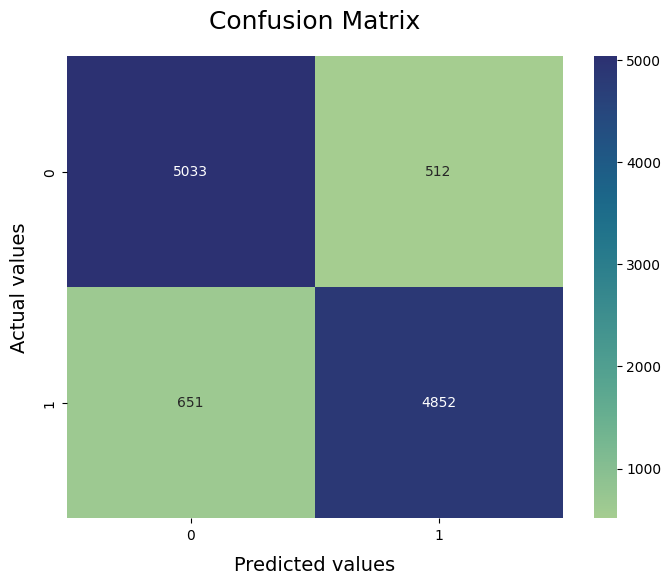

In [36]:
# Initialize AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=500)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
ada_pred = ada_model.predict(X_test)

# Evaluate
print("The model's accuracy on the test set is: " + str(ada_model.score(X_test,y_test)*100)+ "%")
model_Evaluate(y_test,ada_pred)

# Naive Bayes Classifier
Naive Bayes is a simple probabilistic classifier based on Bayes' theorem. It's effective for high-dimensional data and works well for text classification and other applications.




The model's accuracy on the test set is: 74.23062997827661%
              precision    recall  f1-score   support

           0       0.93      0.53      0.67      5545
           1       0.67      0.96      0.79      5503

    accuracy                           0.74     11048
   macro avg       0.80      0.74      0.73     11048
weighted avg       0.80      0.74      0.73     11048



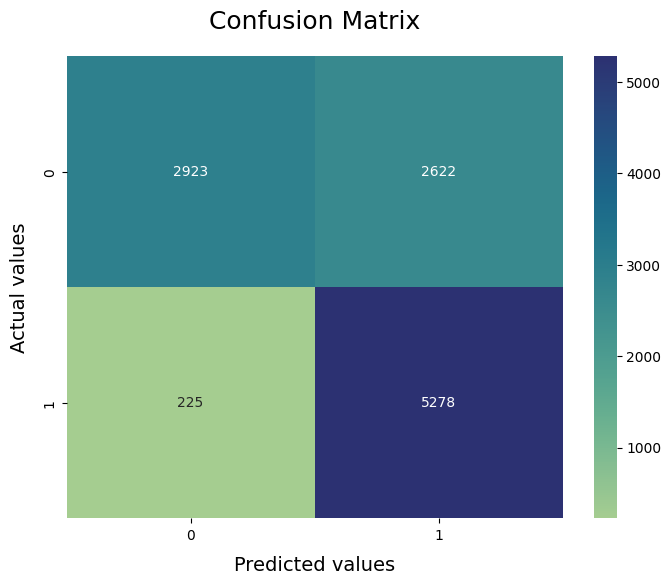

In [37]:
# Create the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)

# Evaluate
print("The model's accuracy on the test set is: " + str(nb_model.score(X_test,y_test)*100)+ "%")
model_Evaluate(y_test,nb_pred)

# 15. Best Model

In [38]:
results = pd.DataFrame({
    'Model': ['LightGBM', 'Random Forest', 'XGBoost', 'AdaBoost', 'Naive Bayes'],
    'Test Accuracy': [model_lgb.score(X_test, y_test), rf_model.score(X_test, y_test), 
                      model_xg.score(X_test, y_test), ada_model.score(X_test, y_test), 
                      nb_model.score(X_test, y_test)]
})
display(results)


,Model,Test Accuracy
0,LightGBM,0.915912
1,Random Forest,0.930395
2,XGBoost,0.917813
3,AdaBoost,0.894732
4,Naive Bayes,0.742306


### This shows that **Random Forest** is the model with the best accuracy.

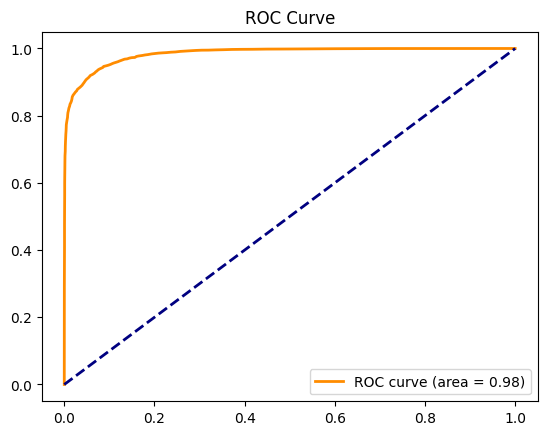

In [39]:
from sklearn.metrics import roc_curve, auc

y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


High Accuracy: The high AUC indicates that the model has a high accuracy in predicting the true class labels.\
Good Balance: The curve's shape suggests a good balance between sensitivity and specificity, making the model suitable for various applications.\
Robustness: The model's performance is robust to different threshold settings.